# Titanic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Slides can be found here: 
https://docs.google.com/presentation/d/1lSzs0hmy6-aqAyRhg30wSoxdjly1RsyfmK0vQfS03Ns/edit?usp=sharing

We can us the pandas read_cvs to function to read the train and test data
Since the train & test data is already in our directory, 
we don't have to specify the full path

In [2]:
train = pd.read_csv("titanic_train.csv") 
test = pd.read_csv("titanic_test.csv")

In [3]:
print("train dimensions: ",train.shape)
print("test dimensions: ",test.shape)

train dimensions:  (891, 12)
test dimensions:  (418, 11)


In [4]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
train.dtypes.to_frame().transpose()

PassengerId Survived Pclass    Name     Sex      Age  SibSp  Parch  Ticket  \
0       int64    int64  int64  object  object  float64  int64  int64  object   

      Fare   Cabin Embarked  
0  float64  object   object

To avoid performing engineering seperatly on training and testing data, we will "concat" the train and data set.

axis = 0 means concating row wise
axis = 1 means concating column wise

In [6]:
# Create full DataFrame
full = pd.concat([train,test],axis=0,ignore_index=True,sort=True)

# Create submission example
sub_example = full[["PassengerId","Survived"]]

# Imputing Missing Values

Since some ML algorithms are not robust to missing values, we need to remove NAs from our data set.

Our data set is very small, we cannot afford to drop columns with missing values. 

In such cases, we use NA imputing to resolve this issue.

Imputing changes the value of NAs to something which the ML algorithm  can understand, while mitigating the risk of adding $influencial$ values. 

For continous features, we usually impute missing values by the mean or the mode of the **training** data.

For categorical featres, we usually impute missing values by a new category called "Missing".



In [7]:
# Which columns have missing values?
full.isna().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
dtype: int64

In [8]:
# Running a for loop over columns of float dtypes: 
for col in full.select_dtypes(["float","int"]): 
    if col != "Survived": # Making sure we are not imputing the Survived values
        # Imputing to the mean of the training set
        full.loc[full[col].isna(),col] = train[col].mean() 

Run a for loop over columns of object dtypes, and impute missing values to a new category called "Missing" 

In [9]:
### Fill Code:
for col in full.select_dtypes("O"):
    full.loc[full[col].isna(),col] = "Missing"

In [10]:
full.isna().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

# Feature Engineering


In [11]:
full.head(10)

Age    Cabin Embarked     Fare  \
0  22.000000  Missing        S   7.2500   
1  38.000000      C85        C  71.2833   
2  26.000000  Missing        S   7.9250   
3  35.000000     C123        S  53.1000   
4  35.000000  Missing        S   8.0500   
5  29.699118  Missing        Q   8.4583   
6  54.000000      E46        S  51.8625   
7   2.000000  Missing        S  21.0750   
8  27.000000  Missing        S  11.1333   
9  14.000000  Missing        C  30.0708   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris    0.0          1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0.0          2.0   
2                             Heikkinen, Miss. Laina    0.0          3.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0.0          4.0   
4                           Allen, Mr. William Henry    0.0          5.0   
5                                   Moran, Mr. James    0.0          6.0   
6                            McCarthy, Mr. Timothy J    0.0          7.0   
7                     Palsson, Master. Gosta Leonard    1.0          8.0   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    2.0          9.0   
9                Nasser, Mrs. Nicholas (Adele Achem)    0.0         10.0   

   Pclass     Sex  SibSp  Survived            Ticket  
0     3.0    male    1.0       0.0         A/5 21171  
1     1.0  female    1.0       1.0          PC 17599  
2     3.0  female    0.0       1.0  STON/O2. 3101282  
3     1.0  female    1.0       1.0            113803  
4     3.0    male    0.0       0.0            373450  
5     3.0    male    0.0       0.0            330877  
6     1.0    male    0.0       0.0             17463  
7     3.0    male    3.0       0.0            349909  
8     3.0  female    0.0       1.0            347742  
9     2.0  female    1.0       1.0            237736

In this section, we will come up with features that are not there in the data set.
For example, the data set doesn't include any features that detail whether a passenger is married.
We can include this feature into our model by using the following code:

In [12]:
# Manual Features Example
full["IsMarriedMan"] = ((full["Sex"] == "male")&(full["SibSp"]>0)&(full["Age"]>18))*1

## Let's think of some other features which will be useful...

In [13]:
### Create Features Here:
full["IsSingleWoman"] = ((full["Sex"] == "female")&(full["SibSp"]>0)&(full["Age"]>18))*1
full["IsChild"] = ((full["Age"]<18)&full["Parch"]>0)*1
full["IsElderyMs"] = ((full["Age"]>65)&(full["SibSp"]==0))

What are some other features that you think we should add into our model?

## String Features

Let's Create a feature which extract the title from the name:

In [14]:
# Create Feature Here:
import re
full["Title"] = full["Name"]
for row in range(0,full.shape[0]):
    full.loc[row,"Title"] = re.sub('(.*, )|(\\..*)',"",full["Name"].loc[row])

In [15]:
dist = pd.Series(index=full["Title"].unique())
for each in dist.index:
    dist.loc[each] = sum(full["Title"]==each)

In [16]:
dist

Mr              757.0
Mrs             197.0
Miss            260.0
Master           61.0
Don               1.0
Rev               8.0
Dr                8.0
Mme               1.0
Ms                2.0
Major             2.0
Lady              1.0
Sir               1.0
Mlle              2.0
Col               4.0
Capt              1.0
the Countess      1.0
Jonkheer          1.0
Dona              1.0
dtype: float64

## Avoiding overfitting to granular data

We see that there are many categorical levels which have very few data points.

We should remove them to avoid overfitting

In [17]:
# Change names
full.loc[full.Title.isin(["Don","Capt","Major","Col","Jonkheer"]),"Title"] = "Mr"
full.loc[full.Title.isin(["Ms","the Countess","Lady"]),"Title"] = "Miss"
full.loc[full.Title.isin(["Mme","Mlle","Dona"]),"Title"] = "Miss"
full.loc[(full.Title=="Sir"),"Title"] = "Mr"

In [18]:
dist_2 = pd.Series(index=full["Title"].unique())
for each in dist_2.index:
    dist_2.loc[each] = sum(full["Title"]==each)
dist_2

# Is 8 to little? That is for you to decide...

Mr        767.0
Mrs       197.0
Miss      268.0
Master     61.0
Rev         8.0
Dr          8.0
dtype: float64

## Outliers

Let's try and find weird outlier. Many ML algorithms are sensitive to outliers. Clipping values is usually very helpful.

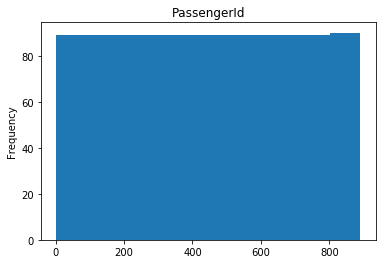

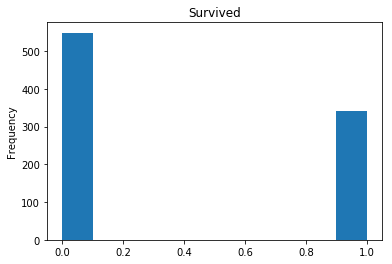

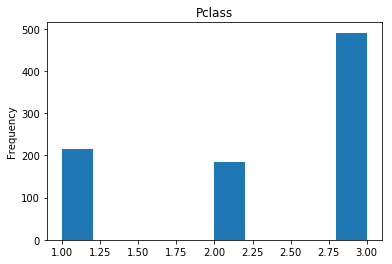

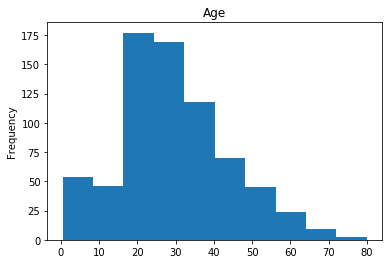

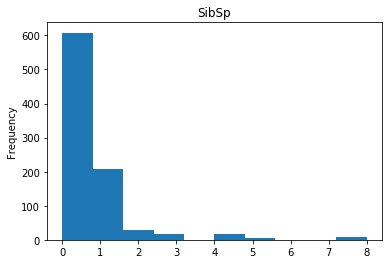

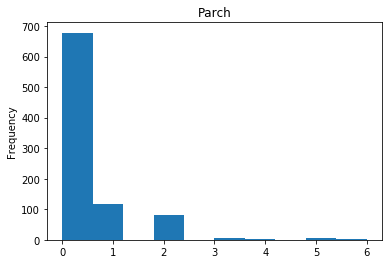

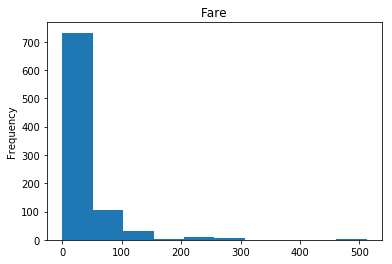

In [19]:
# Plots
for col in train.select_dtypes(["float","int"]).columns: 
    train[col].plot(kind="hist")
    plt.title(col)
    plt.show()

### Age

In [21]:
full.loc[full["Age"].idxmin(5)]

Age                                                 0.17
Cabin                                            Missing
Embarked                                               S
Fare                                              20.575
Name             Dean, Miss. Elizabeth Gladys Millvina""
Parch                                                  2
PassengerId                                         1246
Pclass                                                 3
Sex                                               female
SibSp                                                  1
Survived                                             NaN
Ticket                                         C.A. 2315
IsMarriedMan                                           0
IsSingleWoman                                          0
IsChild                                                1
IsElderyMs                                         False
Title                                               Miss
Name: 1245, dtype: object

In [22]:
train.loc[full["Age"]<2] # Only looking at training data! No Cheating :) 

PassengerId  Survived  Pclass                             Name     Sex  \
78            79         1       2    Caldwell, Master. Alden Gates    male   
164          165         0       3     Panula, Master. Eino Viljami    male   
172          173         1       3     Johnson, Miss. Eleanor Ileen  female   
183          184         1       2        Becker, Master. Richard F    male   
305          306         1       1   Allison, Master. Hudson Trevor    male   
381          382         1       3      Nakid, Miss. Maria ("Mary")  female   
386          387         0       3  Goodwin, Master. Sidney Leonard    male   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
644          645         1       3           Baclini, Miss. Eugenie  female   
755          756         1       2        Hamalainen, Master. Viljo    male   
788          789         1       3       Dean, Master. Bertram Vere    male   
803          804         1       3  Thomas, Master. Assad Alexander    male   
827          828         1       2            Mallet, Master. Andre    male   
831          832         1       2  Richards, Master. George Sibley    male   

      Age  SibSp  Parch           Ticket      Fare    Cabin Embarked  
78   0.83      0      2           248738   29.0000      NaN        S  
164  1.00      4      1          3101295   39.6875      NaN        S  
172  1.00      1      1           347742   11.1333      NaN        S  
183  1.00      2      1           230136   39.0000       F4        S  
305  0.92      1      2           113781  151.5500  C22 C26        S  
381  1.00      0      2             2653   15.7417      NaN        C  
386  1.00      5      2          CA 2144   46.9000      NaN        S  
469  0.75      2      1             2666   19.2583      NaN        C  
644  0.75      2      1             2666   19.2583      NaN        C  
755  0.67      1      1           250649   14.5000      NaN        S  
788  1.00      1      2        C.A. 2315   20.5750      NaN        S  
803  0.42      0      1             2625    8.5167      NaN        C  
827  1.00      0      2  S.C./PARIS 2079   37.0042      NaN        C  
831  0.83      1      1            29106   18.7500      NaN        S

In [23]:
# Create new feature & clip extreme values
full["IsBaby"] = (full["Age"]<2)*1
full.loc[full["Age"]<1,"Age"] = 1

### Fare

In [24]:
# Fare
train.loc[train["Fare"]>200]

PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   

                                                  Name     Sex   Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
88                          Fortune, Miss. Mabel Helen  female  23.0      3   
118                           Baxter, Mr. Quigg Edmond    male  24.0      0   
258                                   Ward, Miss. Anna  female  35.0      0   
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0      0   
311                         Ryerson, Miss. Emily Borie  female  18.0      2   
341                     Fortune, Miss. Alice Elizabeth  female  24.0      3   
377                          Widener, Mr. Harry Elkins    male  27.0      0   
380                              Bidois, Miss. Rosalie  female  42.0      0   
438                                  Fortune, Mr. Mark    male  64.0      1   
527                                 Farthing, Mr. John    male   NaN      0   
557                                Robbins, Mr. Victor    male   NaN      0   
679                 Cardeza, Mr. Thomas Drake Martinez    male  36.0      0   
689                  Madill, Miss. Georgette Alexandra  female  15.0      0   
700  Astor, Mrs. John Jacob (Madeleine Talmadge Force)  female  18.0      1   
716                      Endres, Miss. Caroline Louise  female  38.0      0   
730                      Allen, Miss. Elisabeth Walton  female  29.0      0   
737                             Lesurer, Mr. Gustave J    male  35.0      0   
742              Ryerson, Miss. Susan Parker "Suzette"  female  21.0      2   
779  Robert, Mrs. Edward Scott (Elisabeth Walton Mc...  female  43.0      0   

     Parch    Ticket      Fare            Cabin Embarked  
27       2     19950  263.0000      C23 C25 C27        S  
88       2     19950  263.0000      C23 C25 C27        S  
118      1  PC 17558  247.5208          B58 B60        C  
258      0  PC 17755  512.3292              NaN        C  
299      1  PC 17558  247.5208          B58 B60        C  
311      2  PC 17608  262.3750  B57 B59 B63 B66        C  
341      2     19950  263.0000      C23 C25 C27        S  
377      2    113503  211.5000              C82        C  
380      0  PC 17757  227.5250              NaN        C  
438      4     19950  263.0000      C23 C25 C27        S  
527      0  PC 17483  221.7792              C95        S  
557      0  PC 17757  227.5250              NaN        C  
679      1  PC 17755  512.3292      B51 B53 B55        C  
689      1     24160  211.3375               B5        S  
700      0  PC 17757  227.5250          C62 C64        C  
716      0  PC 17757  227.5250              C45        C  
730      0     24160  211.3375               B5        S  
737      0  PC 17755  512.3292             B101        C  
742      2  PC 17608  262.3750  B57 B59 B63 B66        C  
779      1     24160  211.3375               B3        S

249.00622000000033

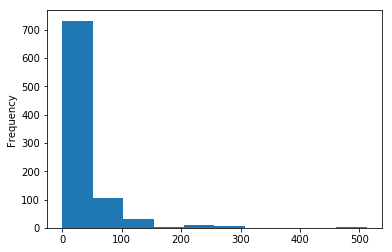

In [27]:
train.Fare.plot(kind="hist")
train.Fare.quantile(.99)

In [26]:
from scipy import stats
stats.percentileofscore(train.Fare,200)

97.75533108866442

In [30]:
# Make new feature?
full["IsRich"] = (full["Fare"]>200)*1
full.loc[full["Fare"]>200,"Age"] = 200

## Final Steps

In [31]:
# Drop useless features
full.drop(["Name","Ticket","Cabin",'PassengerId',"Embarked"],axis=1,inplace=True)

In [32]:
# One Hot Encode Variables
full = pd.get_dummies(full)

In [33]:
# Split Data
train_fe = full[~full.Survived.isna()].loc[0:599]
valid_fe = full[~full.Survived.isna()].loc[600:891]
test_fe = full[full.Survived.isna()]

In [34]:
train_fe.Survived.mean()

0.3933333333333333

# Model Fitting

## Next Time...